## 1시간 강수량에 따른 위험 등급 분포 시각화

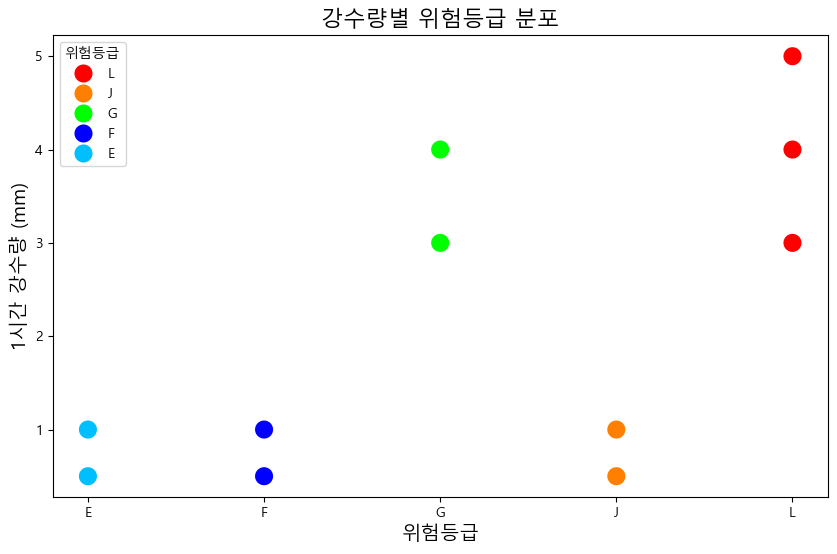

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 사용 (리눅스에서는 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 제대로 표시되게 설정

# 데이터 전처리: 결측값 제거 및 데이터 타입 변환
df = pd.read_csv("도로위험상황예보.csv")
df_clean = df.dropna(subset=['RN_1HR', 'RSK_ELMN_GRD'])  # RN_1HR 및 RSK_ELMN_GRD 열의 결측값 제거
df['RN_1HR'] = pd.to_numeric(df['RN_1HR'], errors='coerce')  # RN_1HR 열을 숫자형으로 변환

# RSK_ELMN_GRD 열의 순서 지정: 등급별 순서를 명시적으로 설정 (E, F, G, J, L 순)
df_clean['RSK_ELMN_GRD'] = pd.Categorical(df_clean['RSK_ELMN_GRD'], categories=["E", "F", "G", "J", "L"], ordered=True)

# 색상 매핑 설정: 위험등급별로 시각화를 위한 색상 지정
color_mapping = {
    'L': '#FF0000',    # 가장 높은 위험도 -> 빨강
    'J': '#FF7F00',    # 두번째 위험도 -> 주황
    'G': '#00FF00',    # 낮은 위험도 -> 초록
    'F': '#0000FF',    # 아주 낮은 위험도 -> 파랑 
    'E': '#00BFFF'     # 가장 낮은 위험도 -> 하늘
}

# 산점도 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.scatterplot(
    x='RSK_ELMN_GRD', y='RN_1HR',  # X축: 위험등급, Y축: 1시간 강수량
    hue='RSK_ELMN_GRD',            # 색상 기준: 위험등급
    data=df_clean,                 # 데이터셋
    palette=color_mapping,         # 색상 매핑 적용
    s=200,                         # 점 크기 설정
    marker='o'                     # 점 모양 설정
)

# 그래프 제목 및 축 레이블 설정
plt.title("강수량별 위험등급 분포", fontsize=16)  # 그래프 제목
plt.ylabel("1시간 강수량 (mm)", fontsize=14)      # Y축 레이블
plt.xlabel("위험등급", fontsize=14)               # X축 레이블

# 범례 순서 재정렬: E, F, G, J, L 순서
handles, labels = plt.gca().get_legend_handles_labels()  # 현재 범례의 핸들과 라벨 가져오기
order = ["L", "J", "G", "F", "E"]  # 라벨 순서 설정
handle_dict = dict(zip(labels, handles))  # 라벨과 핸들을 매핑
ordered_handles = [handle_dict[label] for label in order]  # 설정한 순서대로 핸들 정렬
ordered_labels = order  # 라벨 순서 지정

# 범례 추가: 정렬된 핸들과 라벨로 범례 생성
plt.legend(handles=ordered_handles, labels=ordered_labels, title='위험등급')

# 그래프 출력
plt.show()
